In [ ]:
! pip install pyscf, ase

### Calculation of the Potential Energy Surface (PES) of a Diatomic Molecule

This code snippet is designed to plot a potential energy surface (PES) scan and save both the plot and the data to files.  To explain this code, I'll break it down step by step:

### 1. Importing Libraries
```python
import numpy as np
from matplotlib import pyplot as plt
import csv
from pyscf import gto
```
- **Explanation**: This section imports the necessary libraries. 
    - `numpy` and `matplotlib.pyplot` for numerical and plotting functionalities.
    - `csv` for reading and writing CSV files.
    - `pyscf.gto` for molecular structure and basis set specification.

### 2. Defining Molecular Structure and DFT Calculation Functions
```python
def set_mol(atomic_symbols, b, basis='631g'):
    ...
    
def set_atom_coord(atomic_symbols, x, basis='631g', output='pyscf.log'):
    ...
    
def run_dft(mol, xc_func='b3lyp'):
    ...
    
def calc_e_for_d(atomic_symbols, x, basis='631g', xc_func='b3lyp', int_coord=False):
    ...
```
- **Explanation**: These functions are used to set up the molecular structure, specify the atomic coordinates, run DFT calculations, and calculate energies for diatomic molecules.

### 3. Running DFT Calculation and Gradient Functions
```python
atomic_symbols = ['O', 'O']
my_mf = calc_e_for_d(atomic_symbols, x=1.2, int_coord=True)

def calc_gradient(mf):
    ...
    
def calc_hessian(mf):
    ...
```
- **Explanation**: 
    - `calc_e_for_d` function calculates the DFT energy for a given molecular configuration.
    - `my_mf` stores the DFT calculation result.
    - `calc_gradient` and `calc_hessian` functions are used to calculate the gradient and Hessian matrix, respectively.

### 4. Diatomic Potential Energy Surface (PES) Scan Function
```python
def diatom_PES_scan(atomic_symbols, d_init: float, d_end: float, npoints: int, basis='631g_d_p_', xc_func='b3lyp'):
    ...
```
- **Explanation**: This function performs a scan of the potential energy surface (PES) for a diatomic molecule by varying the bond distance (`d_init` to `d_end`) and calculating the energy at each point.

### 5. Performing PES Scan and Printing Results
```python
d_init = 0.9
d_end = 2.5
npoints = 100

x0 = np.array([[0.0, 0.0, -0.7],
               [0.0, 0.0, 0.7]])
atomic_symbols = ['N', 'N']

n2_pes = diatom_PES_scan(atomic_symbols, d_init, d_end, npoints)
print(n2_pes)
```
- **Explanation**: 
    - Sets initial parameters for the PES scan:
        - The PES will be calculated from a distance between the N-N atoms from 0.9 to 2.5 Angstroms
        - 100 points of the PES will be computed withing this range. The more points, the higher resolution for our PES.
    - Defines the initial atomic coordinates (`x0`).
    - Sets up the molecular structure by defining the atoms in the `atomic_symbols` list, an N2 molecule in this case
    - Calls the `diatom_PES_scan` function to perform the scan and stores the results in `n2_pes`.
    - Prints the calculated PES data.

Put all together, this code looks like this:

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import csv

from pyscf import gto

from ase.units import Hartree, kcal, mol

def set_mol (atomic_symbols, b, basis = '631g'):
     x = [[0. , 0., -b / 2],
         [0. , 0.,  b / 2]]
     mol = set_atom_coord(atomic_symbols, x, basis)
     return mol
    

def set_atom_coord(atomic_symbols, x, basis='631g', output='pyscf.log'):
     mol = gto.Mole()
     coords = list()
     for sym, x in zip(atomic_symbols, x):
          coords.append([sym, x])
     mol.atom = coords 
     mol.basis=basis
     mol.output=output
     mol.verbose = 0
     mol.build()
     return mol


def run_dft(mol, xc_func = 'b3lyp'):
     mf = mol.KS()
     mf.xc = xc_func
     mf.max_cycle=300
     mf.kernel()
     return mf


def calc_e_for_d(atomic_symbmols, x, basis = '631g', xc_func = 'b3lyp', int_coord = False):
     mol = set_mol(atomic_symbmols, b=x) if int_coord else set_atom_coord(atomic_symbmols, x, basis) 
     mf = run_dft(mol, xc_func)
     return mf 

atomic_symbols = ['O', 'O']
my_mf = calc_e_for_d(atomic_symbols, x=1.2, int_coord=True)


def calc_gradient(mf):
     g = mf.Gradients().kernel()
     return g


def calc_hessian(mf):
     h = mf.Hessian().kernel()
     return h


def diatom_PES_scan(atomic_symbols, d_init:float, d_end:float, npoints:int, basis='631g_d_p_', xc_func='b3lyp'):
        step = (d_end - d_init) / npoints
        bonds = list() 
        for d in range(npoints):
            bond = d_init + d * step
            bonds.append(bond)
        bonds.append(d_end)
        
        energies = dict()
        for dist in bonds:
            print(dist)
            mf = calc_e_for_d(atomic_symbols, dist, basis=basis, xc_func = xc_func, int_coord=True)
            e = mf.e_tot 
            energies[dist] = e

        return energies

d_init = 0.9
d_end = 2.5
npoints = 100

x0 = np.array([[0.0, 0.0, -0.7],
              [0.0, 0.0, 0.7]]
)
atomic_symbols = ['N', 'N']

n2_pes = diatom_PES_scan(atomic_symbols, d_init, d_end, npoints)
n2_pes

0.9
0.916
0.932
0.9480000000000001
0.964
0.98
0.996
1.012
1.028
1.044
1.06
1.076
1.092
1.108
1.124
1.1400000000000001
1.1560000000000001
1.1720000000000002
1.1880000000000002
1.204
1.22
1.236
1.252
1.268
1.284
1.3
1.316
1.332
1.348
1.364
1.38
1.396
1.412
1.428
1.444
1.46
1.476
1.492
1.508
1.524
1.54
1.556
1.572
1.588
1.604
1.62
1.6360000000000001
1.6520000000000001
1.6680000000000001
1.6840000000000002
1.7000000000000002
1.7160000000000002
1.7320000000000002
1.748
1.764
1.78
1.796
1.812
1.828
1.844
1.8599999999999999
1.876
1.892
1.908
1.924
1.94
1.956
1.972
1.988
2.004
2.02
2.036
2.052
2.068
2.084
2.1
2.116
2.132
2.148
2.164
2.18
2.196
2.212
2.228
2.244
2.2600000000000002
2.2760000000000002
2.2920000000000003
2.308
2.324
2.34
2.356
2.372
2.388
2.404
2.42
2.436
2.452
2.468
2.484
2.5


{0.9: -109.25291976867356,
 0.916: -109.291602065111,
 0.932: -109.32521290900524,
 0.9480000000000001: -109.35422850443197,
 0.964: -109.37908305662388,
 0.98: -109.40017273217684,
 0.996: -109.41785908055905,
 1.012: -109.43247203933082,
 1.028: -109.4443127106436,
 1.044: -109.45365593751616,
 1.06: -109.46075258481993,
 1.076: -109.46583156611214,
 1.092: -109.46910166690353,
 1.108: -109.47075323415875,
 1.124: -109.47095976858384,
 1.1400000000000001: -109.46987936169852,
 1.1560000000000001: -109.46765594419585,
 1.1720000000000002: -109.46442039465964,
 1.1880000000000002: -109.46029165044826,
 1.204: -109.45537777815082,
 1.22: -109.44977688467611,
 1.236: -109.44357787036168,
 1.252: -109.43686114865946,
 1.268: -109.4296994198788,
 1.284: -109.42215838170458,
 1.3: -109.41429728949656,
 1.316: -109.40616942601801,
 1.332: -109.39782258404863,
 1.348: -109.38929959153111,
 1.364: -109.38063877973461,
 1.38: -109.3718743431616,
 1.396: -109.36303665158843,
 1.412: -109.3541525

<Axes: xlabel='Bond Distance ($\\AA$)', ylabel='Relative Energy (eV)'>

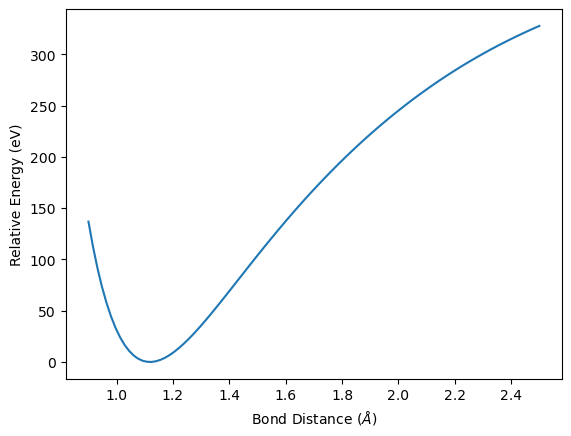

In [7]:
def plot_scan(d1:dict, label:str):
    # Function to plot a PES scan and save the plot and data to files.
    # Parameters:
    # - d1: a dictionary containing the PES scan as a collection of x:y points
    # - label: string for the name of the output files (both PNG and TXT)

    # Convert the dictionary keys and values to numpy arrays for plotting
    x = np.array(list(d1.keys()))
    y1 = np.array(list(d1.values()))
    
    # scale the energies to kcal/mol
    energy_conversion = Hartree * mol / kcal
    
    # Normalize the energies by subtracting the minimum energy value
    y1_min = min(y1)
    y1 = (y1 - y1_min) * energy_conversion

    # Create a figure and axis for the plot
    fig, ax1 = plt.subplots()
    
    # Plot the normalized energies against bond distances
    ax1.plot(x, y1) 
    
    # Set the x-axis and y-axis labels
    ax1.set_xlabel(r'Bond Distance ($\AA$)')
    ax1.set_ylabel('Relative Energy (eV)')
    
    # Generate the filename for the PNG file and save the plot
    pngfile = label + '.png'
    plt.savefig(pngfile)

    # Generate the filename for the data file and save the data to a CSV file
    data_file = label + '.txt'
    with open(data_file, mode='w', newline='') as data_f:
        writer = csv.writer(data_f)
        # Write each key-value pair (bond distance and energy) to the CSV file
        for key, value in d1.items():
            writer.writerow([key, value])
    return ax1

# Example usage of the function
plot = plot_scan(n2_pes, 'N2_PES')
plot

#### Function Definition

The `plot_scan` function takes a PES dictionary and a label as input and generates a plot and data file.

```python
def plot_scan(d1:dict, label:str):
```
- **`d1`**: A dictionary containing the PES scan as a collection of bond distance (x) and energy (y) points.
- **`label`**: A string used to name the output PNG and TXT files.

#### Convert Dictionary to Numpy Arrays

The bond distances and energies are extracted from the dictionary and converted to numpy arrays for easier manipulation and plotting.

```python
    x = np.array(list(d1.keys()))
    y1 = np.array(list(d1.values()))
```

#### Normalize Energies

The energy values are normalized by subtracting the minimum energy value, ensuring the plot starts from zero.

```python
    y1_min = min(y1)
    y1 = y1 - y1_min 
```

#### Create Plot

A figure and axis for the plot are created, and the bond distances and normalized energies are plotted.

```python
    fig, ax1 = plt.subplots()
    
    print(x)
    print(y1)
    
    ax1.plot(x, y1) 
    ax1.set_xlabel(r'Bond Distance ($\AA$)')
    ax1.set_ylabel('Relative Energy (eV)')
```
- **Debugging**: The bond distances and normalized energies are printed for debugging purposes.
- **Plotting**: The bond distances (x) and normalized energies (y1) are plotted. The axes are labeled accordingly.

#### Save Plot to PNG File

The plot is saved to a PNG file using the provided label.

```python
    pngfile = label + '.png'
    plt.savefig(pngfile)
```

#### Save Data to CSV File

The bond distances and energies are saved to a CSV file using the provided label.

```python
    data_file = label + '.txt'
    with open(data_file, mode='w', newline='') as data_f:
        writer = csv.writer(data_f)
        for key, value in d1.items():
            writer.writerow([key, value])
```
- **Data File**: The data file is opened in write mode, and each key-value pair from the dictionary is written to the file as a row.

#### Example Usage

The function is called with a sample PES dictionary (`n2_pes`) and a label (`N2_PES`) to demonstrate its usage.

```python
plot_scan(n2_pes, 'N2_PES')
```

This function provides a convenient way to visualize and save PES scans, which is a common task in computational chemistry for analyzing the energy profile of molecular systems.

### Quadratic Fit of the PES around the Minimum

-108.94890216093937


<module 'matplotlib.pyplot' from '/Users/Josete/miniforge3/envs/pyscf/lib/python3.12/site-packages/matplotlib/pyplot.py'>

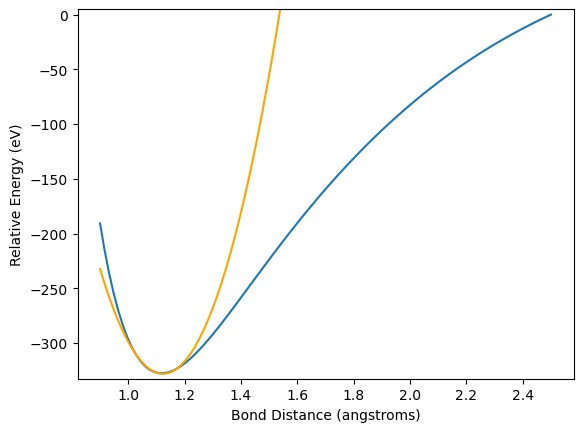

In [13]:

def plot_quad_fit(pes:dict, i, j, lbl:str):
    # Function to plot a monodimensional PES and a quadratic fit on top of it. 
    # The plot will be stored in a PNG file.
    # Parameters:
    # - pes: a dictionary containing the PES as a collection of x:y points
    # - i: the value of x where the quadratic fit should start
    # - j: the value of x where the quadratic fit should end
    # - lbl: string for the name of the PNG file where the plot is stored

    # Initialize lists to store bond distances and energies within the specified range
    bs = list()
    es = list()
    # Initialize lists to store all bond distances and energies
    tot_b = list()
    tot_e = list()
    
    # Loop through the PES dictionary to separate the data points
    for b, e in pes.items():
        # Store all bond distances and energies
        tot_b.append(b)
        tot_e.append(e)
        # Store bond distances and energies within the range [i, j]
        if i <= b <= j:
            bs.append(b)
            es.append(e)
    
    # Convert the filtered lists to numpy arrays for fitting
    x = np.array(bs)
    y = np.array(es)
    # Perform a quadratic fit to the selected data points
    quad_fit = np.polyfit(x, y, 2)
    
    # Convert all bond distances and energies to numpy arrays for plotting
    bonds = np.array(tot_b)
    energies = np.array(tot_e)
    # Evaluate the quadratic fit over all bond distances
    y_quad = np.polyval(quad_fit, bonds)
    
    # Find the minimum and maximum energies for plotting adjustments
    ymin = min(energies)
    ymax = max(energies)
    print(ymax)
    
    # scale the energies to kcal/mol
    energy_conversion = Hartree * mol / kcal

    # Plot the molecular energy relative to the maximum energy
    plt.plot(bonds, (energies - ymax) * energy_conversion, label='Molecular Energy')
    # Plot the quadratic fit relative to the maximum energy
    plt.plot(bonds, (y_quad - ymax) * energy_conversion, label='Parabolic Fit', color='orange')
    # Label the x-axis and y-axis
    plt.xlabel('Bond Distance (angstroms)')
    plt.ylabel('Relative Energy (eV)')
    # Set the y-axis limits to ensure the plot is properly scaled
    plt.ylim([(ymin - ymax) * energy_conversion - 5, 5])
    
    # Generate the filename for the plot and save it as a PNG file
    png_name = lbl + '_quadratic_fit.png'
    plt.savefig(png_name)
    
    return plt

quad_fit = plot_quad_fit(n2_pes, 1.0, 1.2, 'quad_fit_test')
quad_fit